# My Courses Exploratory Analysis

This notebook is an adaptation of the exercises given in the course [Réalisez une analyse exploratoire de données]( https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5148885-telechargez-les-jeux-de-donnees-analyses-dans-ce-cours) 

A correction of the exercises was published here : [correction on GitHub](https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire).

In the present notebook we apply this solution to the dataset '''my_courses.csv''' collected with the application OC-Courses-Explorer 

Apart from the notebook itself, the functions.py file is directly imported from the Github repository.


## Setup / Import

In [1]:
my_courses_file='../data/my_courses.csv'

## My Courses PCA

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
titreCours,,,,,,,,,,
Mettez en place un système de veille informationnelle,12,0,0,4.0,1,9,1.0,3,03/03/2021,4805776
Réalisez une analyse exploratoire de données,40,43,0,15.0,2,19,1.0,2,15/12/2020,4525281
Initiez-vous à Python pour l'analyse de données,41,100,0,12.0,1,11,1.0,3,22/03/2021,6204541
Démarrez votre projet avec Python,40,100,0,4.0,1,15,1.0,3,03/06/2021,4262331
Learn Python Basics for Data Analysis,47,0,0,12.0,1,12,1.0,2,21/01/2021,2304731


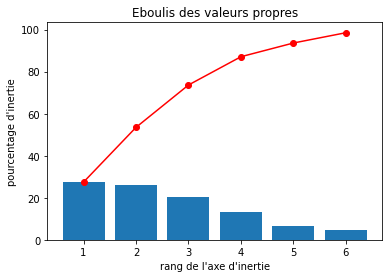

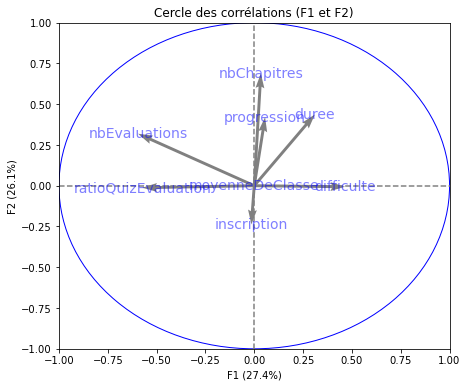

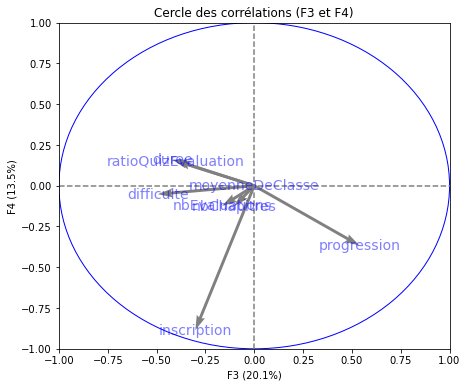

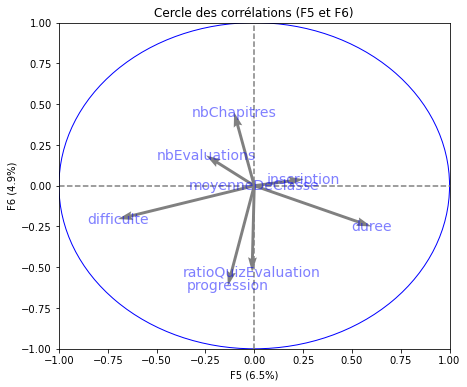

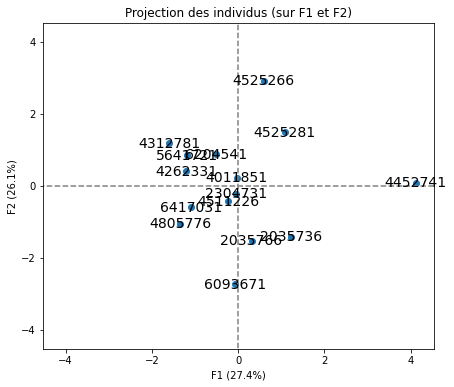

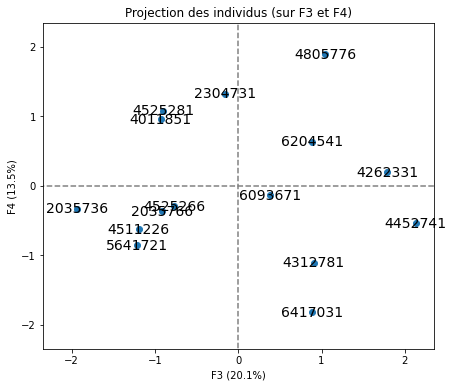

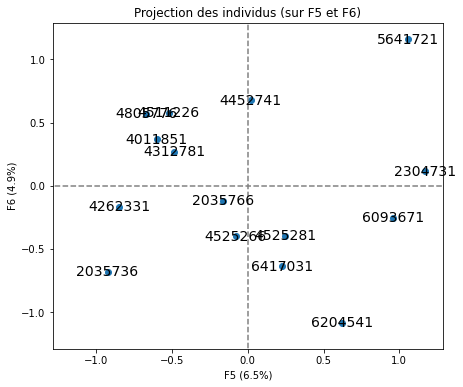

In [9]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

# choix du nombre de composantes à calculer
n_comp = 6

# import de l'échantillon
data = pd.read_csv(my_courses_file,decimal=".",index_col=0)
# replace some content for cleanup
data["inscription"] = (data["inscription"].str.replace(" days","")).astype(int)
display(data.head())

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[["inscription","progression","moyenneDeClasse","duree","difficulte","nbChapitres","ratioQuizEvaluation","nbEvaluations"]]


# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data["idCours"] # ou data.index pour avoir les intitulés
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

plt.show()



## Clustering Bag of Words

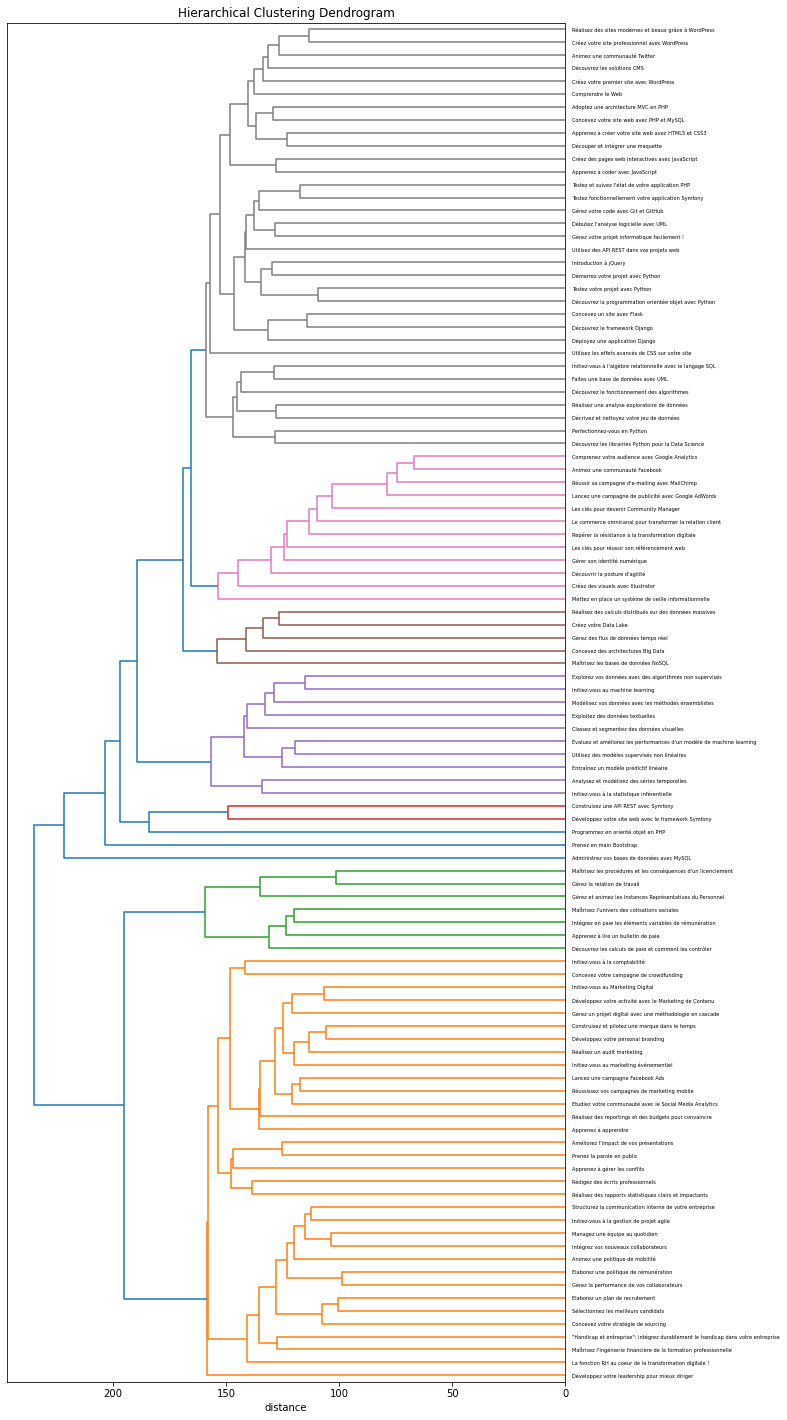

               title                                   
cluster           1  2  3  4  5   6  7  8  9   10 11 12
theme                                                  
RH                14  4  3  0  0   0  0  2  0   0  0  0
RH & marketing     6  0  0  0  0   0  0  3  0   1  0  0
data               1  0  0  0  0  10  5  0  4   0  0  0
dev                0  0  0  2  1   0  0  0  3  18  1  1
marketing         10  0  0  0  0   0  0  6  0   2  0  0
multi-parcours     2  0  0  0  0   0  0  1  0   5  0  0


In [12]:
import pandas as pd
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

# import de l'échantillon et des informations relatives aux cours
data = pd.read_csv('bag_of_words.csv', index_col = 0)
courses_info = pd.read_csv('courses_info.csv',index_col = 0)

# Theme du ou des parcours auxquels appartient le cours (data, developpement, marketing, etc.)
theme = [courses_info.loc[course_id, "theme"] for course_id in data.index]

# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

# Coupage du dendrogramme en 12 clusters
clusters = fcluster(Z, 12, criterion='maxclust')
#clusters = fcluster(Z, 159, criterion='distance') # ligne équivalente à la précédente

# Comparaison des clusters trouvés avec les classification des cours en différents thèmes
courses = pd.DataFrame({"theme": theme, "cluster": clusters, "title": names})
print(courses.pivot_table(index="theme", columns="cluster", aggfunc=len, fill_value=0))


## PCA Bag of words


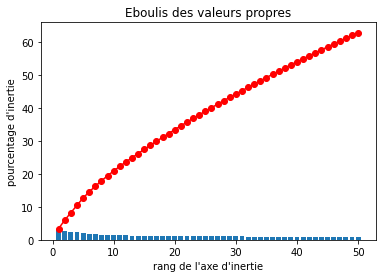

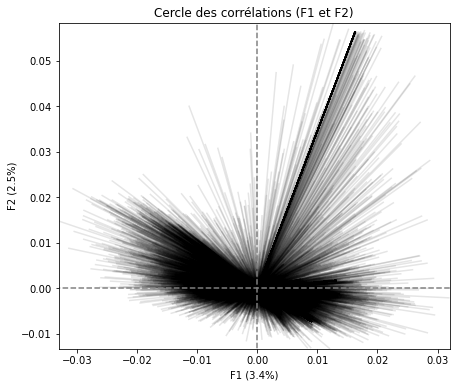

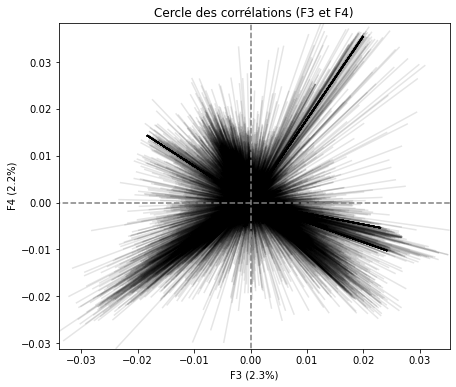

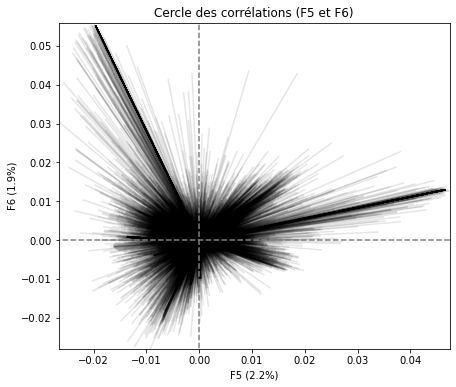

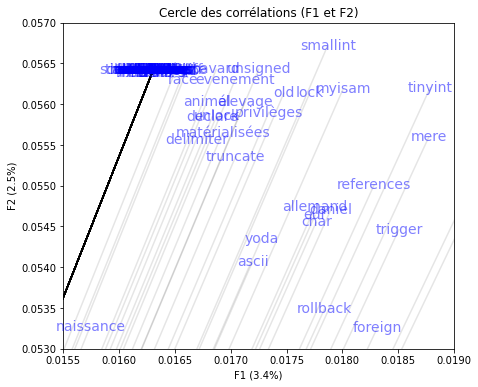

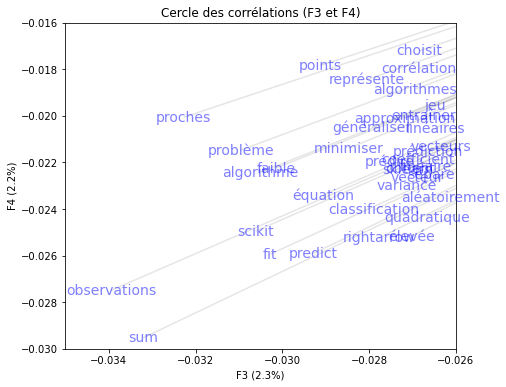

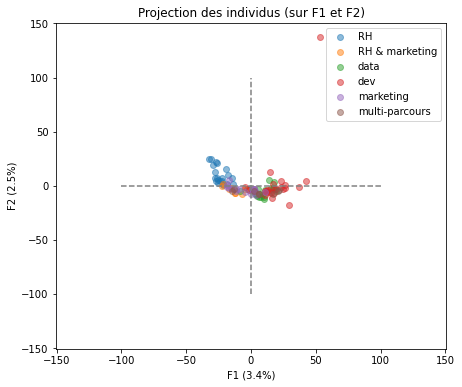

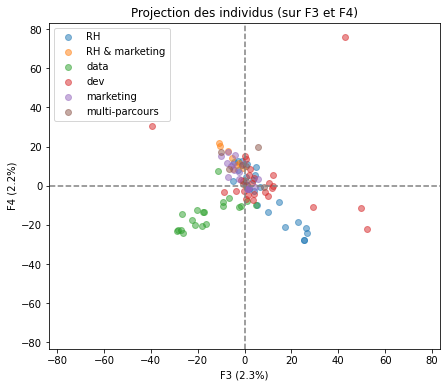

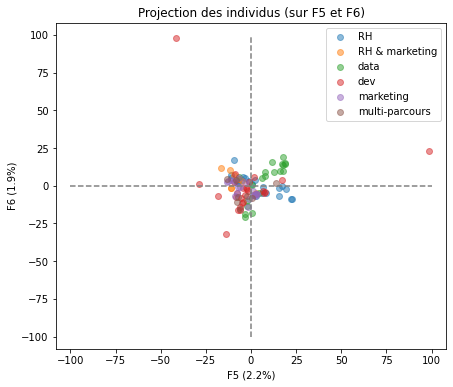

In [13]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing 
from functions import *   

# choix du nombre de composantes à calculer
n_comp = 50

# import de l'échantillon et des informations relatives aux cours
data = pd.read_csv('bag_of_words.csv', index_col = 0)
courses_info = pd.read_csv('courses_info.csv',index_col = 0)

# Theme du ou des parcours auxquels appartient le cours (data, developpement, marketing, etc.)
theme = [courses_info.loc[course_id, "theme"] for course_id in data.index]

# préparation des données pour l'ACP
X = data.values
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)])
display_circles(pcs, n_comp, pca, [(0,1)], lims=[.0155, .019, 0.053, .057], labels = np.array(features))
display_circles(pcs, n_comp, pca, [(2,3)], lims=[-.035, -.026, -.03,-.016], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = theme, alpha = 0.5)

plt.show()


